### ISYE 7406 Project

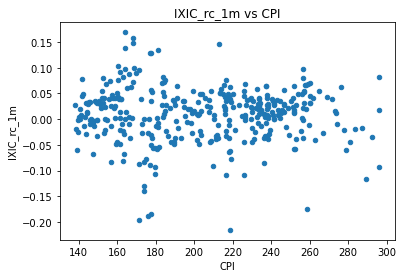

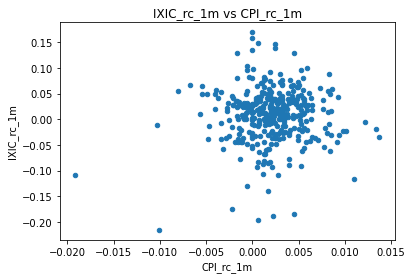

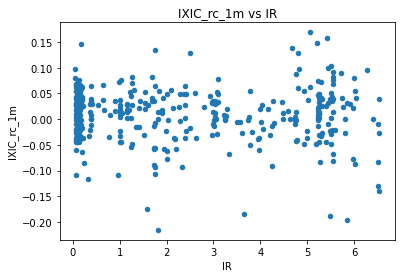

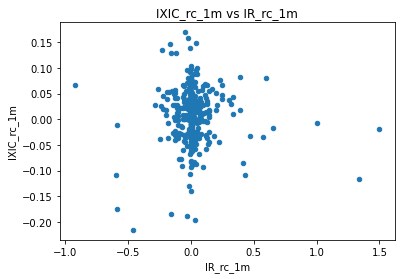

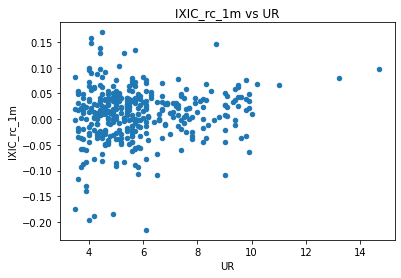

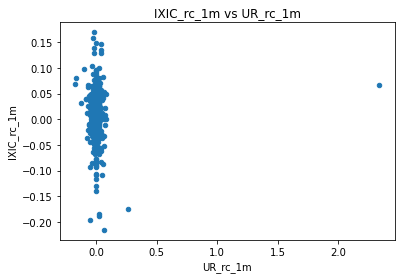

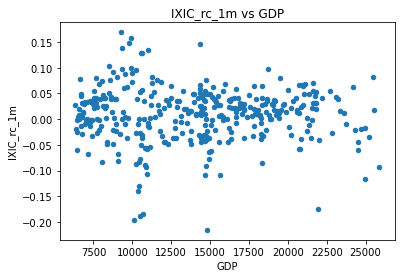

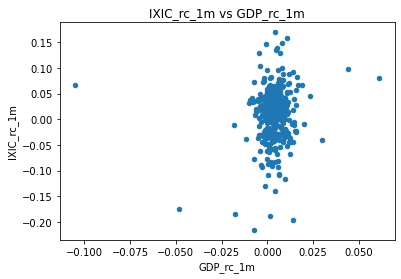

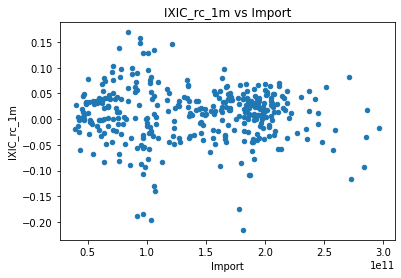

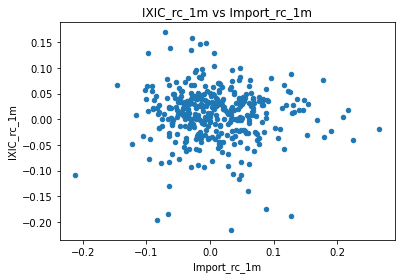

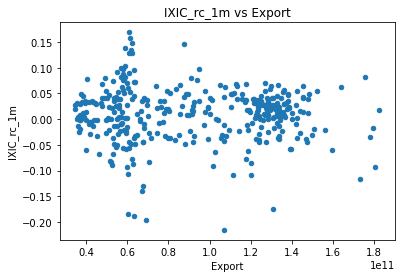

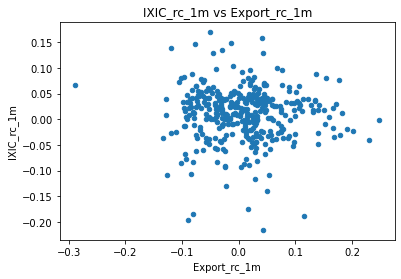

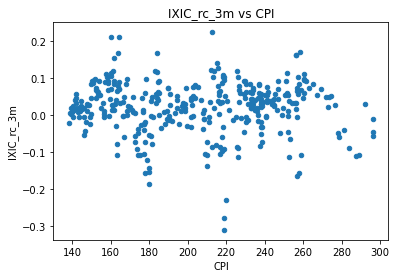

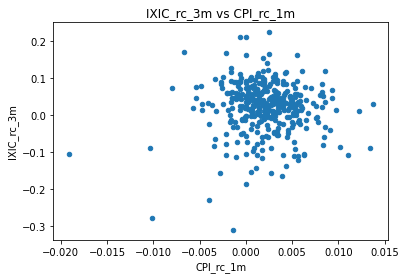

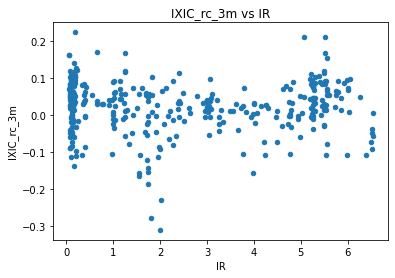

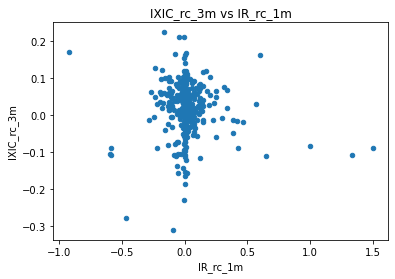

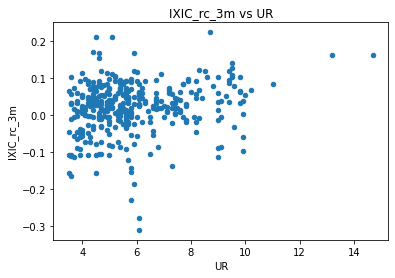

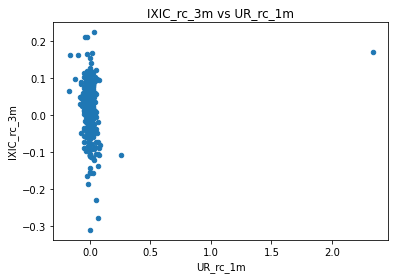

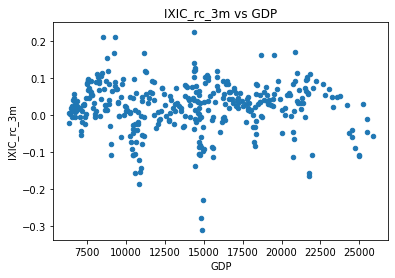

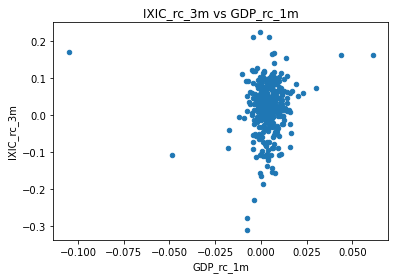

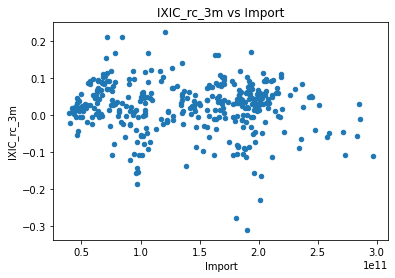

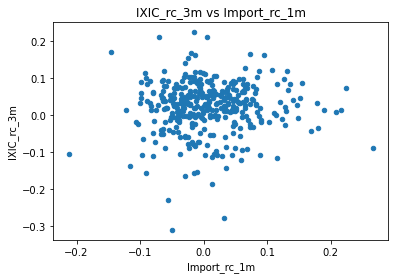

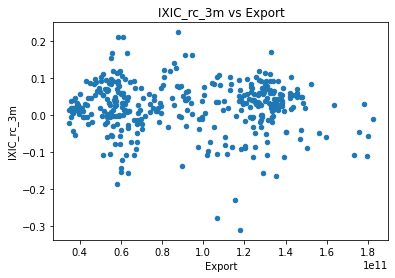

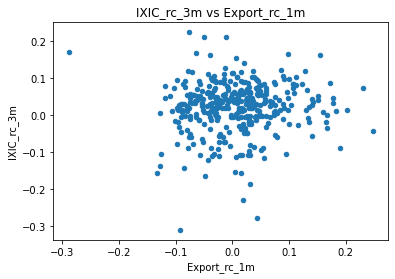

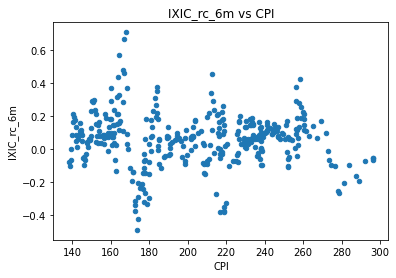

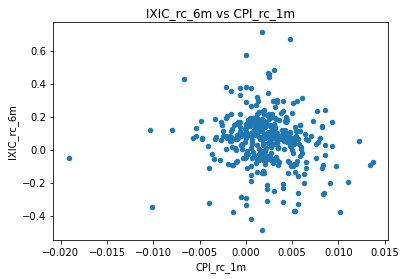

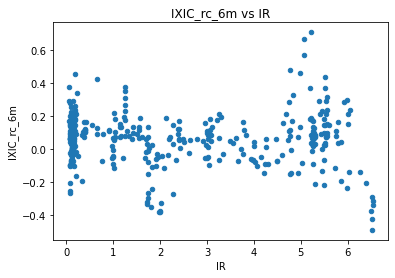

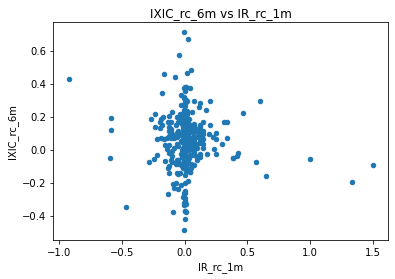

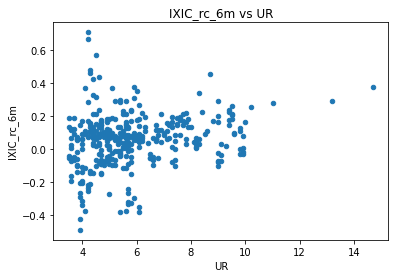

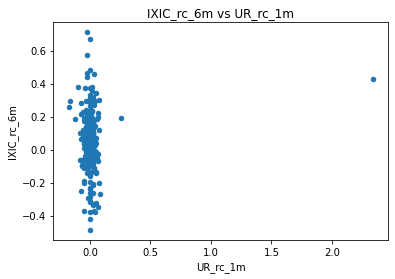

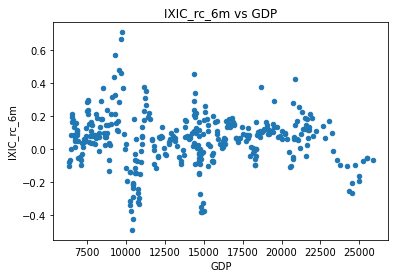

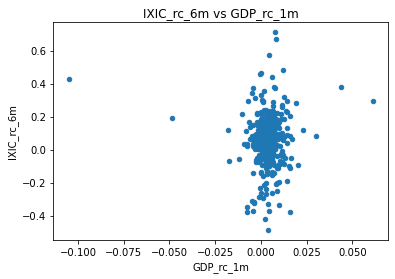

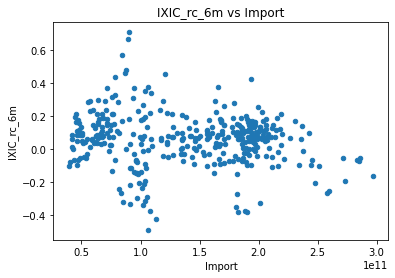

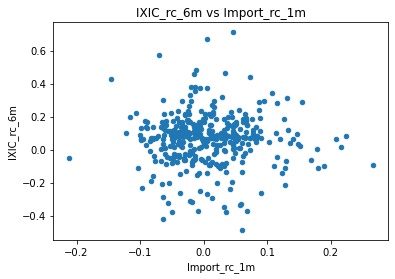

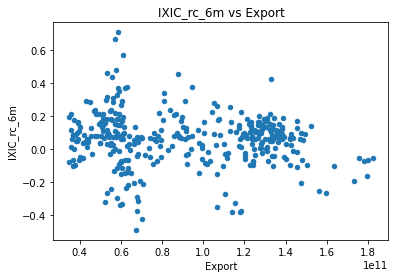

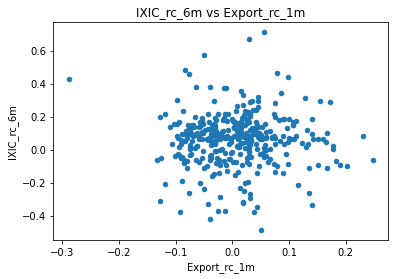

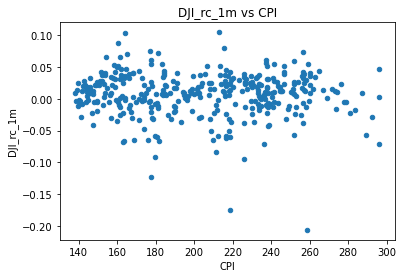

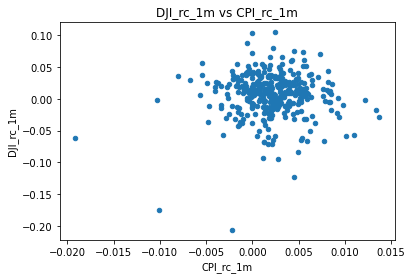

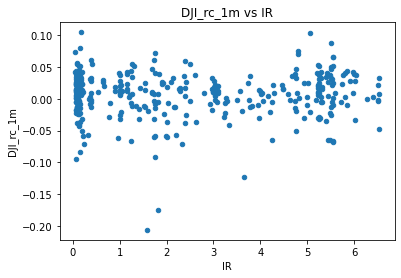

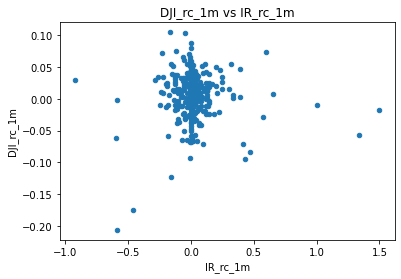

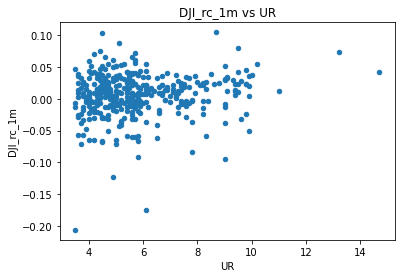

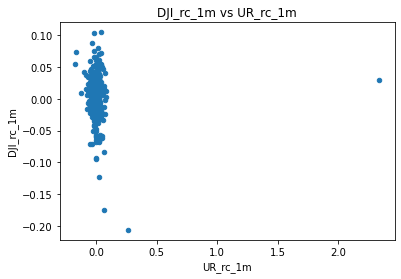

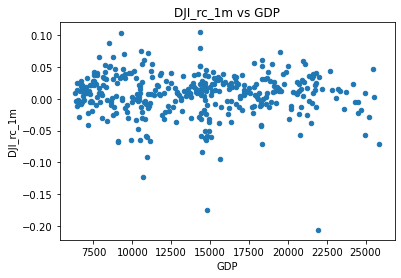

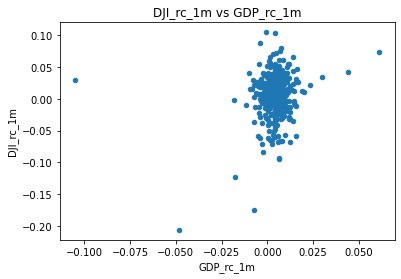

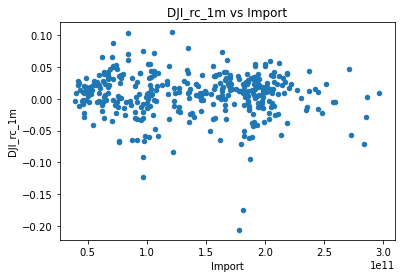

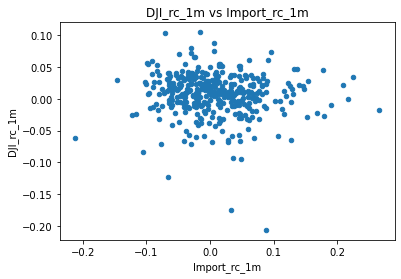

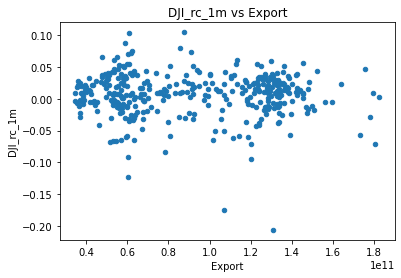

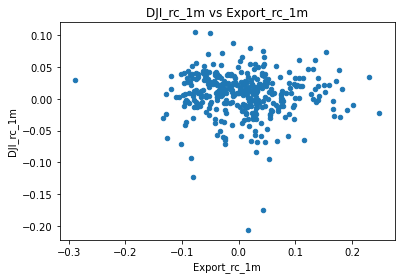

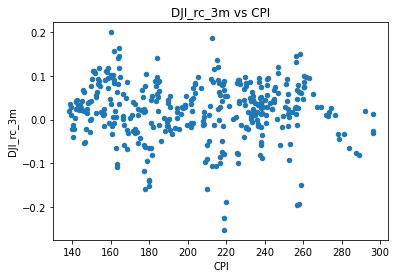

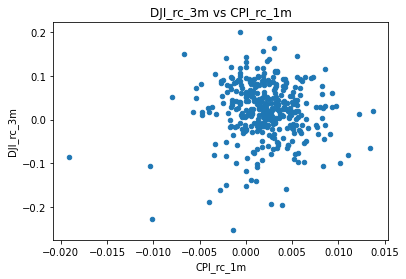

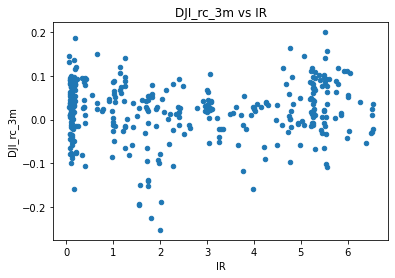

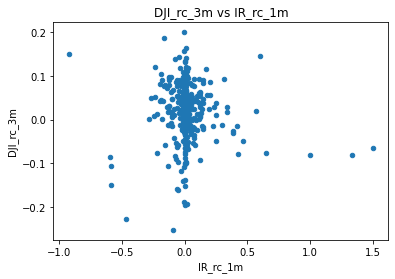

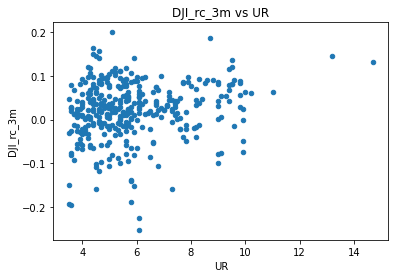

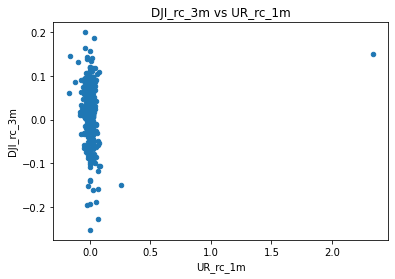

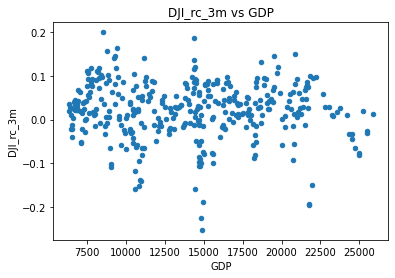

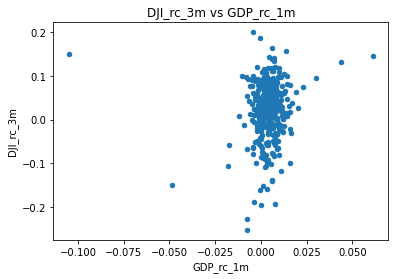

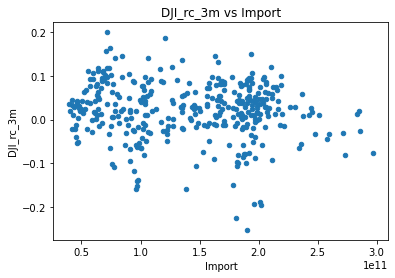

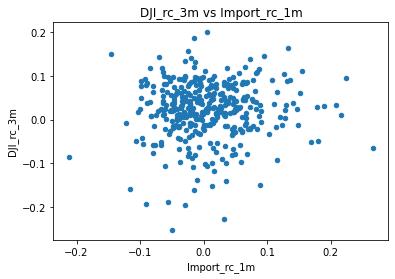

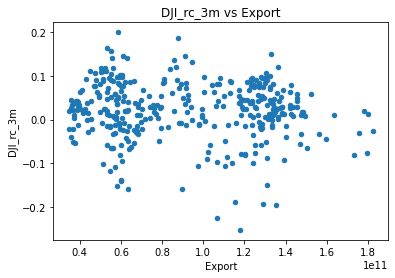

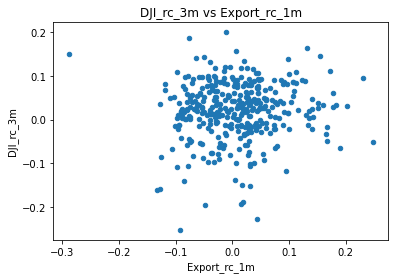

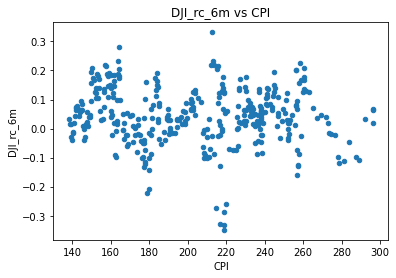

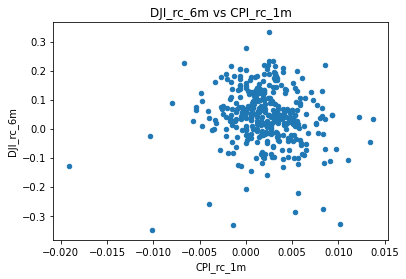

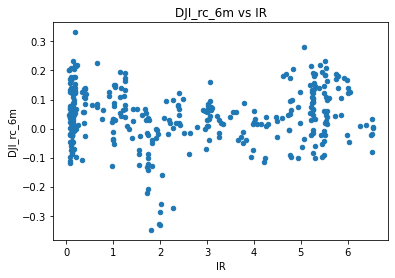

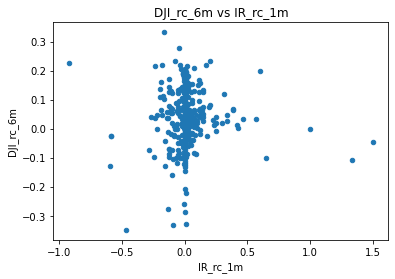

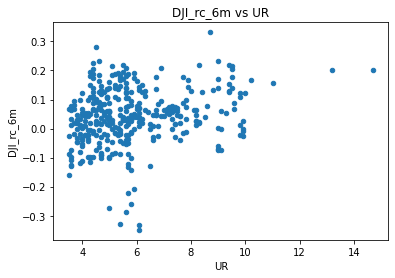

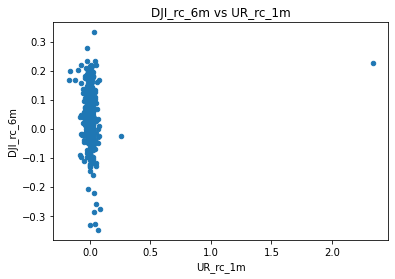

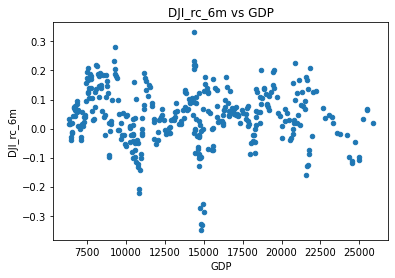

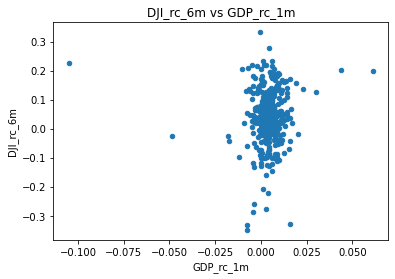

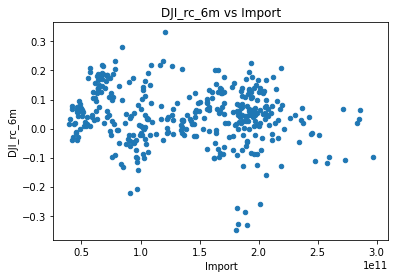

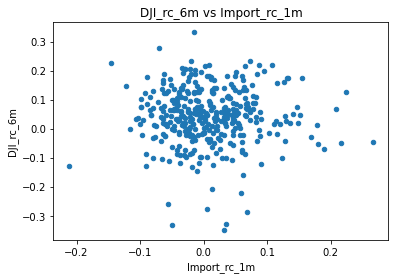

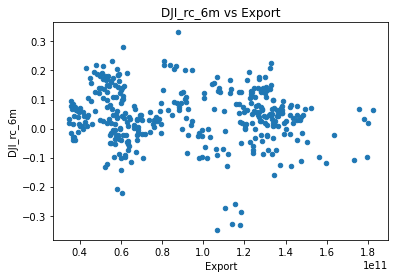

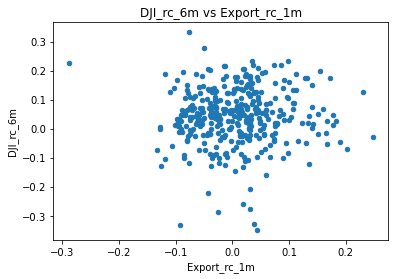

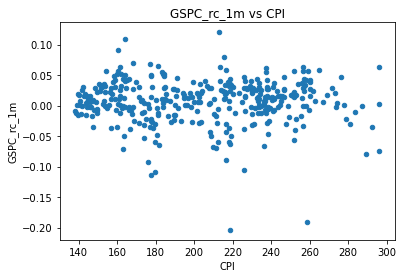

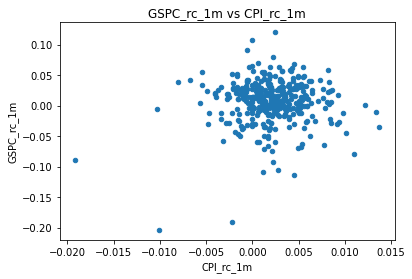

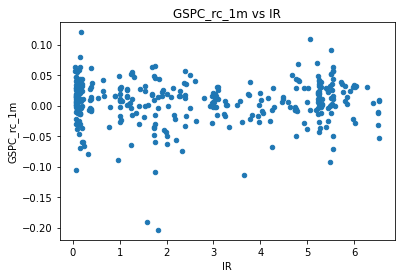

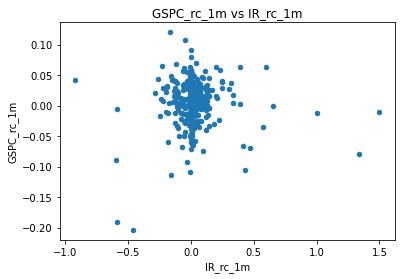

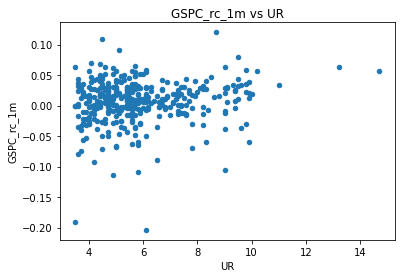

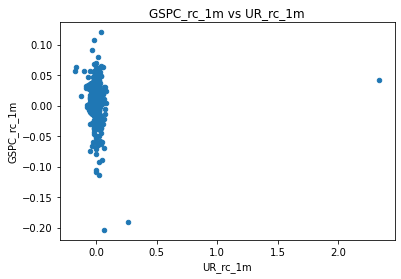

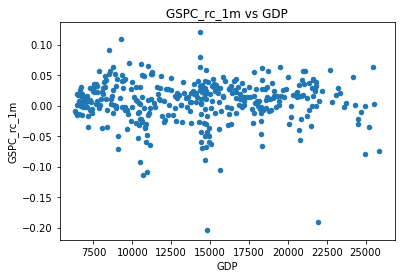

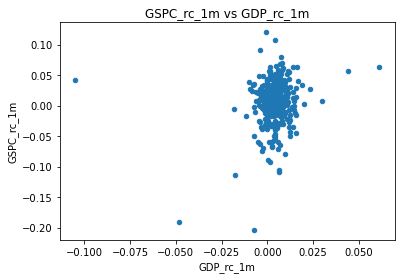

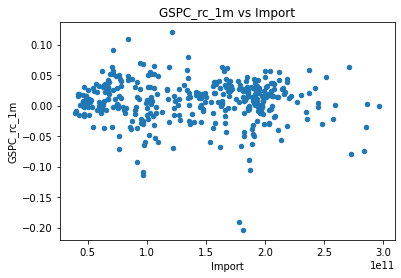

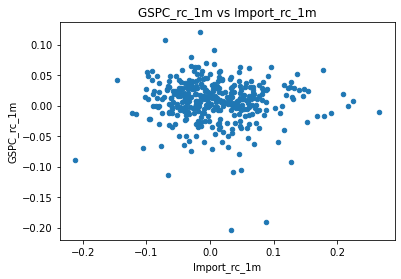

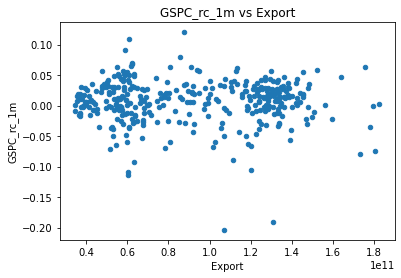

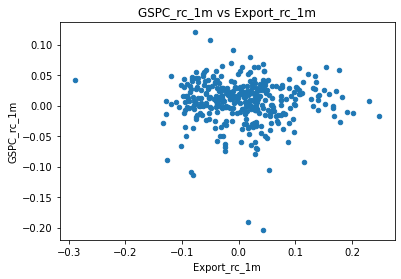

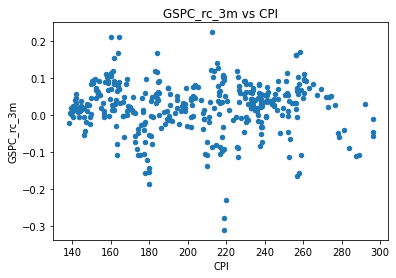

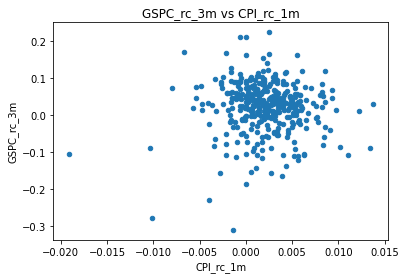

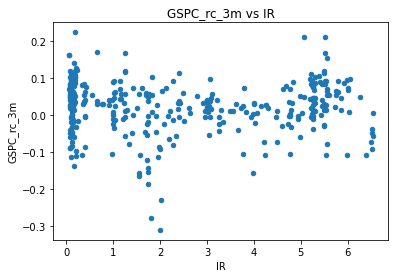

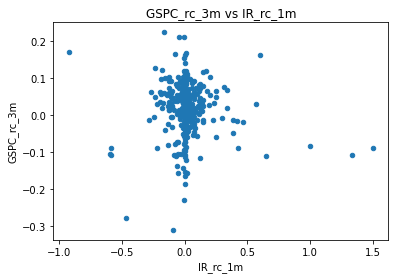

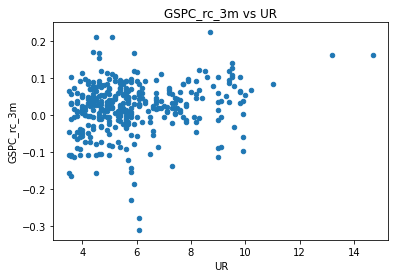

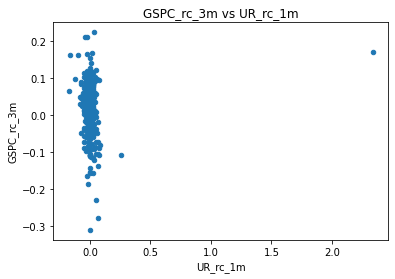

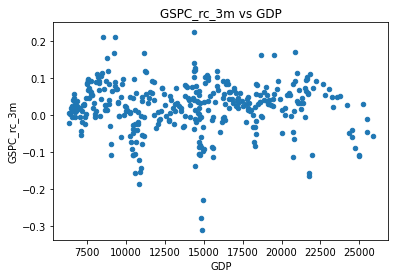

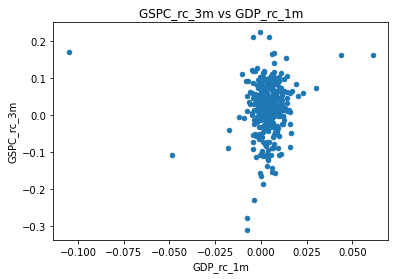

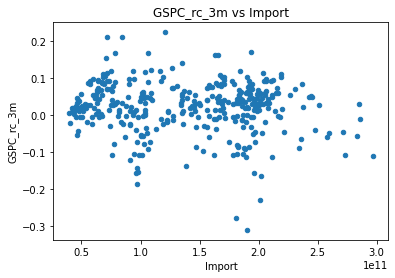

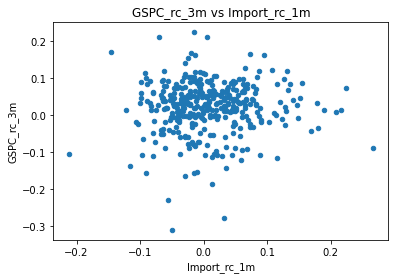

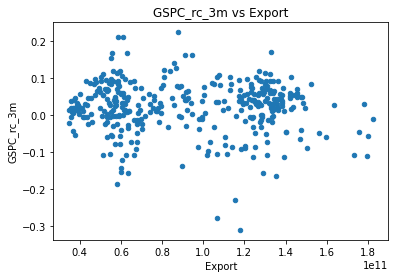

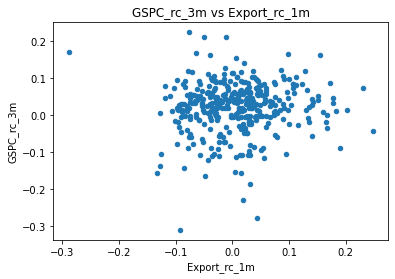

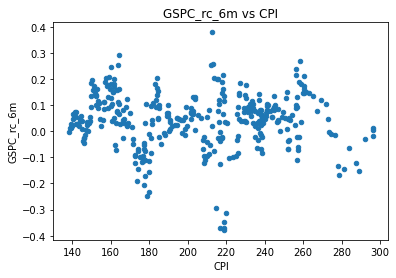

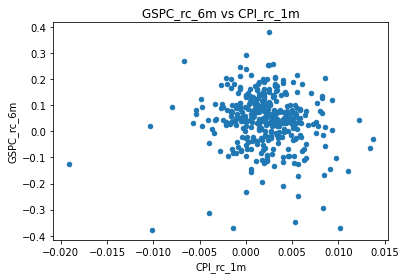

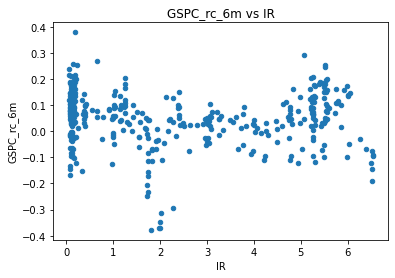

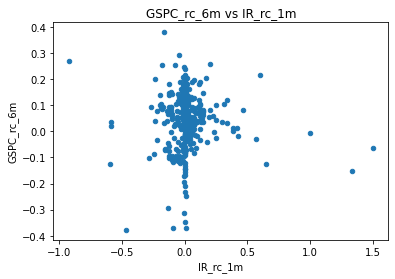

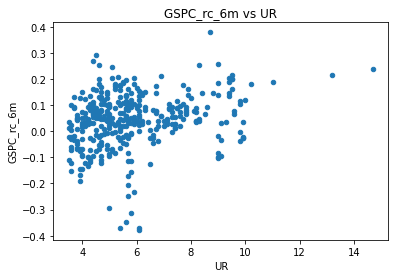

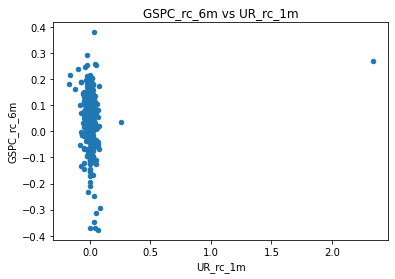

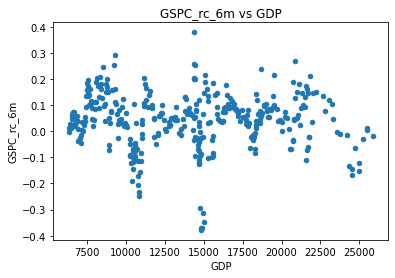

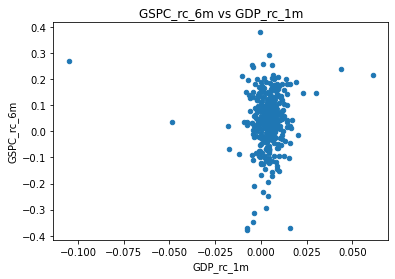

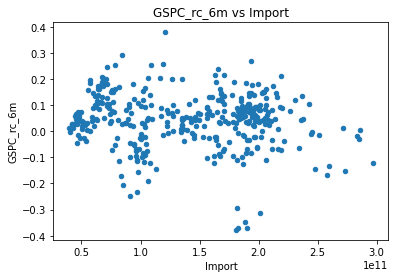

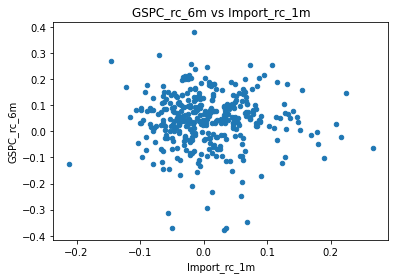

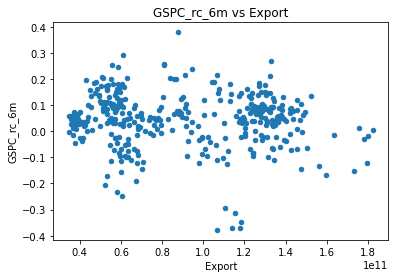

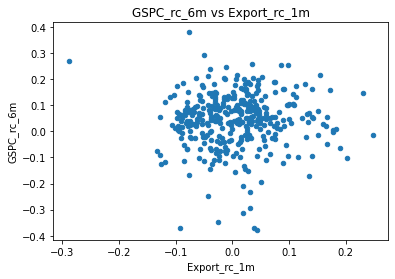

XGBoost
0      True
1      True
2      True
3      True
4      True
5     False
6      True
7     False
8      True
9      True
10     True
11     True
12     True
13     True
14    False
15    False
16     True
17    False
18    False
19     True
20     True
21    False
22    False
23     True
dtype: bool
SVM
0      True
1     False
2      True
3      True
4      True
5     False
6      True
7     False
8      True
9      True
10     True
11     True
12    False
13    False
14    False
15    False
16    False
17     True
18     True
19     True
20    False
21    False
22     True
23     True
dtype: bool
RandomForest
0      True
1     False
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12    False
13     True
14    False
15    False
16    False
17    False
18     True
19    False
20     True
21    False
22    False
23    False
dtype: bool
RMSE: 5.150160339870163
XGBoost
0      True
1     False
2      True
3      

/var/folders/lf/2prbc3h96p39ng_h9zg9dd740000gn/T/ipykernel_70059/286431577.py:209: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(24, 6))


SVM
0     False
1     False
2     False
3      True
4     False
5      True
6      True
7      True
8      True
9     False
10    False
11     True
12     True
13    False
14    False
15     True
16    False
17     True
18    False
19     True
20    False
21    False
22    False
23     True
dtype: bool
RandomForest
0      True
1     False
2      True
3      True
4     False
5     False
6      True
7      True
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15    False
16    False
17     True
18    False
19     True
20     True
21    False
22    False
23    False
dtype: bool
RMSE: 3.6204413392626766
XGBoost
0      True
1     False
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14    False
15    False
16     True
17     True
18     True
19     True
20    False
21     True
22    False
23     True
dtype: bool
SVM
0      True
1      True
2      True
3      Tru

<Figure size 432x288 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

<Figure size 1728x432 with 0 Axes>

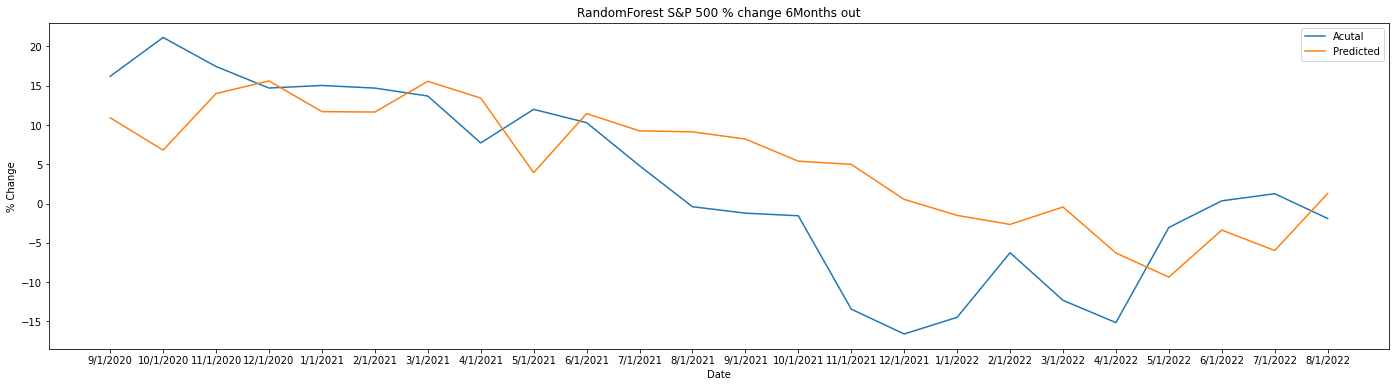

In [17]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV



###################################################################
# Doing some data exploration, find correlation matrix to determine
# best dependent and independent variable to use
###################################################################
# data = pd.read_csv("Project Data_stock_index_shifted.csv")

# stock_index=['Nasdaq 1 Month Prediction','Nasdaq 3 Month Prediction','Nasdaq 6 Month Prediction', \
#               'Dow Jones 1 Month Prediction','Dow Jones 3 Month Prediction','Dow Jones 6 Month Prediction',\
#               'S&P500 1 Month Prediction','S&P500 3 Month Prediction','S&P500 6 Month Prediction']
# stock_pos=[14,15,16,18,19,20,22,23,24]
             
# for i in range(9):

#     d1=data.iloc[:,[1,3,5,7,9,11]+[stock_pos[i]]]
#     d1_cm=d1.corr()
#     print(d1_cm)
#     sns.heatmap(d1_cm, annot=True, cmap='coolwarm')
#     plt.title('Correlation Matrix for ' +stock_index[i])
#     plt.show()
    
# #d1 = data.iloc[:, list(range(2, 7)) + [8, 10, 12, 25]]
# d1=data.iloc[:,list(range(2,13,2))+[27]]
# d1_cm=d1.corr()
# print(d1_cm)
# sns.heatmap(d1_cm, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix for ')
# plt.show()

# d2=data.iloc[:,[5,14]]
# d2.plot(x='UR',y='IXIC_1m', kind='scatter')
# plt.title('CPI VS Nasdaq 1 Month Forecast')
# plt.show()

###################################################################
# Plot the each index against selected variables for EDA
###################################################################
correlations = []
for si in [25, 26, 27]:
    correlation_set = [data.columns[si]]
    for var in list(range(1,13)):
        d2 = data.iloc[:,[si,var]]
        d2.plot(x=data.columns[var], y=data.columns[si], kind='scatter')
        plt.title(data.columns[si] + ' vs ' + data.columns[var])
        plt.show()
        correlation_set.append(np.corrcoef(data.iloc[:,si], data.iloc[:,var])[0,1])
    correlations.append(correlation_set)

for si in [28, 29, 30]:
    correlation_set = [data.columns[si]]
    for var in list(range(1,13)):
        d2 = data.iloc[:,[si,var]]
        d2.plot(x=data.columns[var], y=data.columns[si], kind='scatter')
        plt.title(data.columns[si] + ' vs ' + data.columns[var])
        plt.show()
        correlation_set.append(np.corrcoef(data.iloc[:,si], data.iloc[:,var])[0,1])
    correlations.append(correlation_set)
    
for si in [31, 32, 33]:
    correlation_set = [data.columns[si]]
    for var in list(range(1,13)):
        d2 = data.iloc[:,[si,var]]
        d2.plot(x=data.columns[var], y=data.columns[si], kind='scatter')
        plt.title(data.columns[si] + ' vs ' + data.columns[var])
        plt.show()
        correlation_set.append(np.corrcoef(data.iloc[:,si], data.iloc[:,var])[0,1])
    correlations.append(correlation_set)

correlations = pd.DataFrame(correlations)
correlations.columns = ['Index'] + data.columns[range(1,13)].to_list()
###################################################################
# Start Modeling
###################################################################
# data = pd.read_csv("Project Data-index only.csv")
# ix_1m=data.iloc[:,list(range(1,7))+[8]]
# ix_1m_train=ix_1m.iloc[0:360]
# ix_1m_test=ix_1m.iloc[360:]

#Stock index with specific prediction period
#column 25-33, nasdaq, DIJ, S&P, 1m, 3m, 6m
#These columns are the rate of change
si_matrix=[[25,26,27],[28,29,30],[31,32,33]]
train_end=344
model_type=['XGBoost','SVM', "RandomForest"]
m_out=[1,3,6]
stock_index=['Nasdaq', 'Dow Jones', 'S&P 500']
month_index=['1','3','6']

# XGBoost when m=0 and SVM when m=1

# Model with all variables

data = pd.read_csv("Project Data_stock_index_shifted.csv")

op_file=pd.DataFrame()
rmse_pd=pd.DataFrame()
op_actual=pd.DataFrame()
op_pred=pd.DataFrame()

# hyperparameters to used to for search for best hyperparameters in Random Forests
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Outer loop selects the stock index
for s in range(3):
    #Inner loop selects month 
    for mi in range(3):
        si=si_matrix[s][mi]
        ix_1m=data.iloc[:,list(range(1,13))+[si]]
        tt_split=list(range(train_end,368))
        #This loop selects which model to use
        for m in range(3):
            y_pred_list=[]
            for i in tt_split:
                ix_1m_train=ix_1m.iloc[0:i]
                #We're always predicting just one record forward of the training data. could be 1m, 3m, or 6m depending on mi value
                ix_1m_test=ix_1m.iloc[i:i+1]
                # split the data into training and testing sets
                x_train=ix_1m_train.iloc[:,0:12]
                y_train=ix_1m_train.iloc[:,12]
                x_test=ix_1m_test.iloc[:,0:12]
                y_test=ix_1m_test.iloc[:,12]
                
                
                if m==0:
                    # initialize the XGBoost model
                    # create a StandardScaler object
                    scaler = StandardScaler()
                    # fit the scaler on the training data
                    scaler.fit(x_train)

                    # transform the training and testing data
                    x_train = scaler.transform(x_train)
                    x_test = scaler.transform(x_test)
                    model = xgb.XGBRegressor()
                else:
                    # train the model on the training data
                    model.fit(x_train, y_train)

                    # make predictions on the testing data
                    y_pred = model.predict(x_test)
                    y_pred_list.append(y_pred[0]*100)
                elif m==1:
                    # build the SVM model
                    #svr = SVR(kernel='rbf', C=1e3, gamma='scale')
                    # create a StandardScaler object
                    scaler = StandardScaler()
                    # fit the scaler on the training data
                    scaler.fit(x_train)

                    # transform the training and testing data
                    x_train = scaler.transform(x_train)
                    x_test = scaler.transform(x_test)
                    model = SVR(kernel='linear')
                # train the model on the training data
                model.fit(x_train, y_train)

                # make predictions on the testing data
                y_pred = model.predict(x_test)
                y_pred_list.append(y_pred[0]*100)
                    # train the model on the training data
                    model.fit(x_train, y_train)

                    # make predictions on the testing data
                    y_pred = model.predict(x_test)
                    y_pred_list.append(y_pred[0]*100)
                else:
                    #Put the code here to instantiate a linear regression model
                    
                    # train the model on the training data
                    #Use AIC or BIC, with Stepwise Regression to fit a model to the data
                    model = Lasso()
                    model.fit(x_train, y_train)
                    #print(model.coef_)
                    # make predictions on the testing data
                    y_pred = model.predict(x_test)
                    y_pred_list.append(y_pred[0]*100)
                
            #tt_split is the list of indexes for iloc
            y_actual_list=ix_1m.iloc[tt_split,12]*100
            x_date=data.iloc[tt_split,0]
            plt.clf()
            plt.figure(figsize=(24, 6))
            plt.plot(x_date, y_actual_list, label='Acutal')
            plt.plot(x_date,y_pred_list, label='Predicted')
            plt.legend()
            plt.xlabel('Date')
            plt.ylabel('% Change')
            plt.title(model_type[m]+' '+stock_index[s]+' % change '+month_index[mi] +'Months out')
            #plt.title("Nasdaq 3 month out")
            plt.savefig('images/'+model_type[m]+stock_index[s]+month_index[mi])
            # Show the plot
            #plt.show()
            y_actual_pn=y_actual_list>0
            y_actual_pn=y_actual_pn.reset_index(drop=True)
            y_test_pn=pd.Series(y_pred_list)>0
            print(model_type[m])
            class_rate=y_actual_pn==y_test_pn
            op_file[stock_index[s]+month_index[mi]+model_type[m]]=class_rate
            print( class_rate)
            # # evaluate the performance of the model
            rmse = np.sqrt(mean_squared_error(y_actual_list, y_pred_list))
            rmse_pd[stock_index[s]+month_index[mi]+model_type[m]]=[rmse]
            op_actual[stock_index[s]+month_index[mi]+model_type[m]]=y_actual_list
            op_pred[stock_index[s]+month_index[mi]+model_type[m]]=y_pred_list
            
        print("RMSE:", rmse)
op_file.to_csv("output/classfication rate.csv", index=False)
rmse_pd.to_csv('output/rmse.csv', index=False)
op_actual.to_csv('output/op_actual.csv', index=False)
op_pred.to_csv('output/op_pred.csv',index=False)